In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#loading the data set
df = pd.read_csv('/content/drive/MyDrive/Terrain Prices Regression Challenge/terrain_data.csv')

In [43]:
# Overview Of the Data
df.head()

,id,location_type,altitude,area_sq_m,slope_deg,soil_quality,distance_city_center_km,distance_to_school_km,distance_to_hospital_km,distance_to_market_km,...,distance_nearest_park_km,proximity_public_transport,pedestrian_index,employer_density,school_density,hospital_density,amenities_score,price_per_m2,land_area_m2,target
0,id_0,moor,860,384,29.9,0.06,14.7,0.4,6.5,0.2,...,0.59,1,0.24,19.2,2.1,4.9,0.49,19.53,384,8490.76
1,id_1,canyon,1294,543,7.1,0.63,0.8,9.0,9.5,5.2,...,1.23,1,0.62,114.9,12.5,3.8,0.81,21.63,543,13011.02
2,id_2,cliff,1130,1067,5.3,0.77,1.7,5.6,7.8,7.0,...,4.34,1,0.02,54.4,2.9,0.7,0.93,16.70,1067,16913.06
3,id_3,grove,1095,864,34.4,0.99,22.3,8.7,8.0,9.4,...,2.92,1,0.56,11.7,1.6,0.9,0.56,23.73,864,19270.35
4,id_4,grove,1638,1208,30.2,0.01,23.4,8.3,5.3,1.8,...,2.74,1,0.82,69.2,1.7,3.7,0.14,25.15,1208,30719.48


In [44]:
# brief information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          1500 non-null   object 
 1   location_type               1500 non-null   object 
 2   altitude                    1500 non-null   int64  
 3   area_sq_m                   1500 non-null   int64  
 4   slope_deg                   1500 non-null   float64
 5   soil_quality                1500 non-null   float64
 6   distance_city_center_km     1500 non-null   float64
 7   distance_to_school_km       1500 non-null   float64
 8   distance_to_hospital_km     1500 non-null   float64
 9   distance_to_market_km       1500 non-null   float64
 10  distance_to_industry_km     1500 non-null   float64
 11  proximity_road              1500 non-null   int64  
 12  proximity_water             1500 non-null   int64  
 13  urban_zone                  1500 

In [45]:
# Different subcategories and their frequencey of Location Type Feature
df['location_type'].value_counts()

,count
location_type,
reef,48
canyon,47
savanna,47
vineyard,44
urban,44
bay,43
oasis,42
meadow,42
peninsula,42


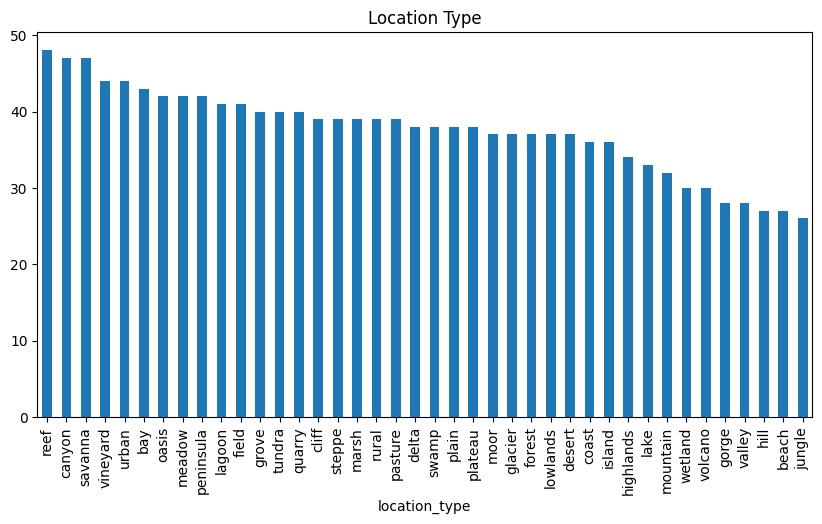

In [46]:
# Different subcategories and their frequencey of Location Type Feature
plt.figure(figsize=(10,5))
df['location_type'].value_counts().plot(kind='bar')
plt.title('Location Type')
plt.show()


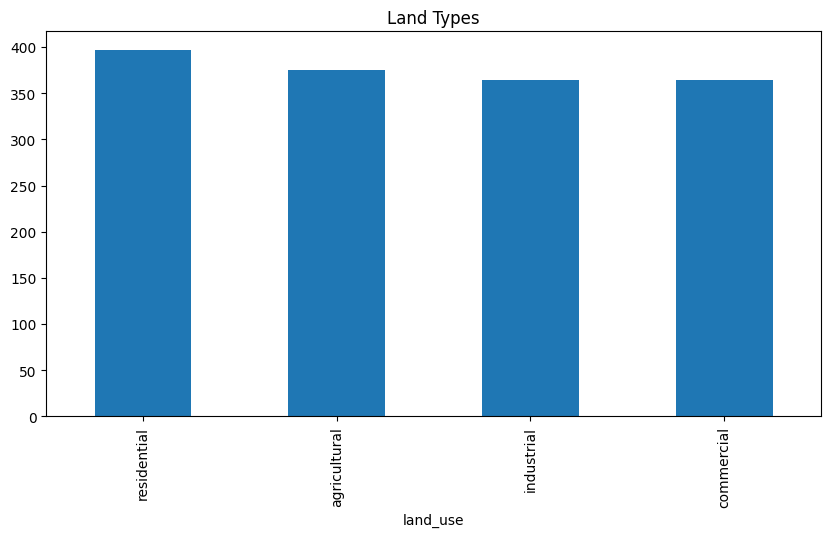

In [47]:

# Different subcategories and their frequencey of Land Type feature
plt.figure(figsize=(10,5))
df['land_use'].value_counts().plot(kind='bar')
plt.title('Land Types')
plt.show()

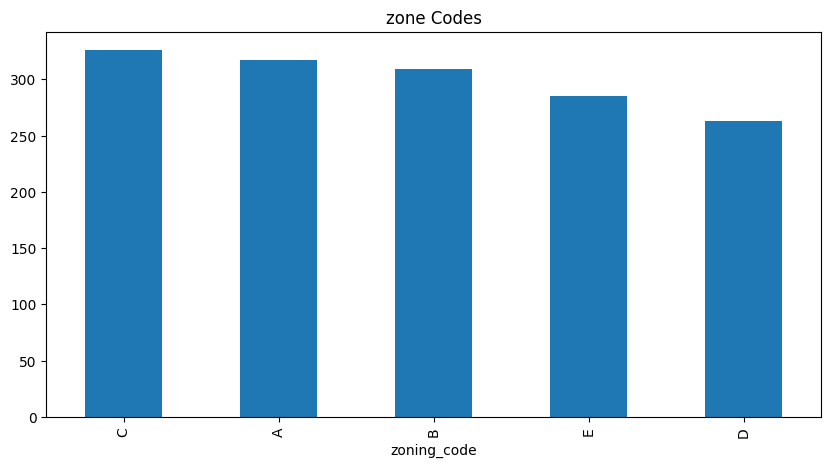

In [48]:
# class distribution of Zone Code
plt.figure(figsize=(10,5))
df['zoning_code'].value_counts().plot(kind='bar')
plt.title('zone Codes')
plt.show()

In [49]:
#storing the name of catecorigal columns in a list variable
cat_cols =['location_type','land_use','zoning_code']

In [50]:
# Filtering out all the Numerical value columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

In [51]:
#summary statistics of the features.
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
altitude,1500.0,1510.307333,869.062246,1.000,767.5000,1502.0000,2221.0000,2999.00
area_sq_m,1500.0,808.857333,200.558303,130.000,676.0000,809.0000,946.0000,1499.00
slope_deg,1500.0,22.595333,12.912443,0.000,11.4000,23.0000,33.8250,44.90
soil_quality,1500.0,0.488200,0.289817,0.000,0.2400,0.4800,0.7400,1.00
distance_city_center_km,1500.0,19.870667,20.115508,0.000,6.0750,14.2000,27.0500,176.00
distance_to_school_km,1500.0,5.063467,2.924687,0.000,2.6000,5.0500,7.6000,10.00
distance_to_hospital_km,1500.0,5.037867,2.836951,0.000,2.7000,5.1000,7.4000,10.00
distance_to_market_km,1500.0,4.949200,2.891921,0.000,2.5000,4.9000,7.4000,10.00
distance_to_industry_km,1500.0,10.059333,5.679881,0.000,5.2000,10.2000,14.9000,20.00
proximity_road,1500.0,0.502667,0.500160,0.000,0.0000,1.0000,1.0000,1.00


<Axes: ylabel='Frequency'>

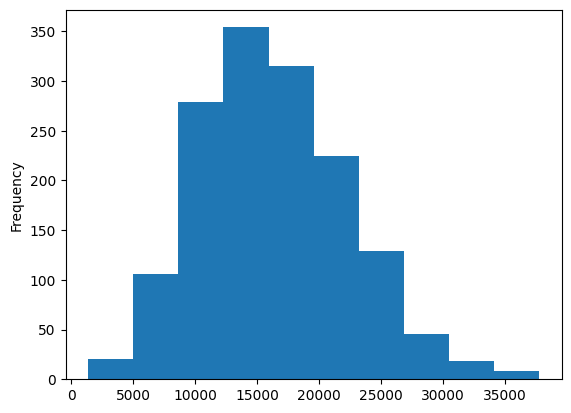

In [52]:
# Distribution of the target Column - the Prise of the Lands

df['target'].plot(kind='hist')

In [53]:
print ('total no of Numerical features ',len(num_cols))
print(num_cols)

total no of Numerical features  41
['altitude', 'area_sq_m', 'slope_deg', 'soil_quality', 'distance_city_center_km', 'distance_to_school_km', 'distance_to_hospital_km', 'distance_to_market_km', 'distance_to_industry_km', 'proximity_road', 'proximity_water', 'urban_zone', 'protected_area', 'flood_risk', 'earthquake_risk', 'average_temp_C', 'annual_rainfall_mm', 'sun_hours_per_year', 'crime_rate', 'air_quality_index', 'noise_pollution_index', 'internet_access', 'median_income_area', 'unemployment_rate', 'GDP_growth_rate', 'interest_rate', 'population_density', 'historical_site', 'neighborhood_quality', 'tax_rate', 'avg_property_age', 'distance_nearest_park_km', 'proximity_public_transport', 'pedestrian_index', 'employer_density', 'school_density', 'hospital_density', 'amenities_score', 'price_per_m2', 'land_area_m2', 'target']


**Feature Distribution : histogram**

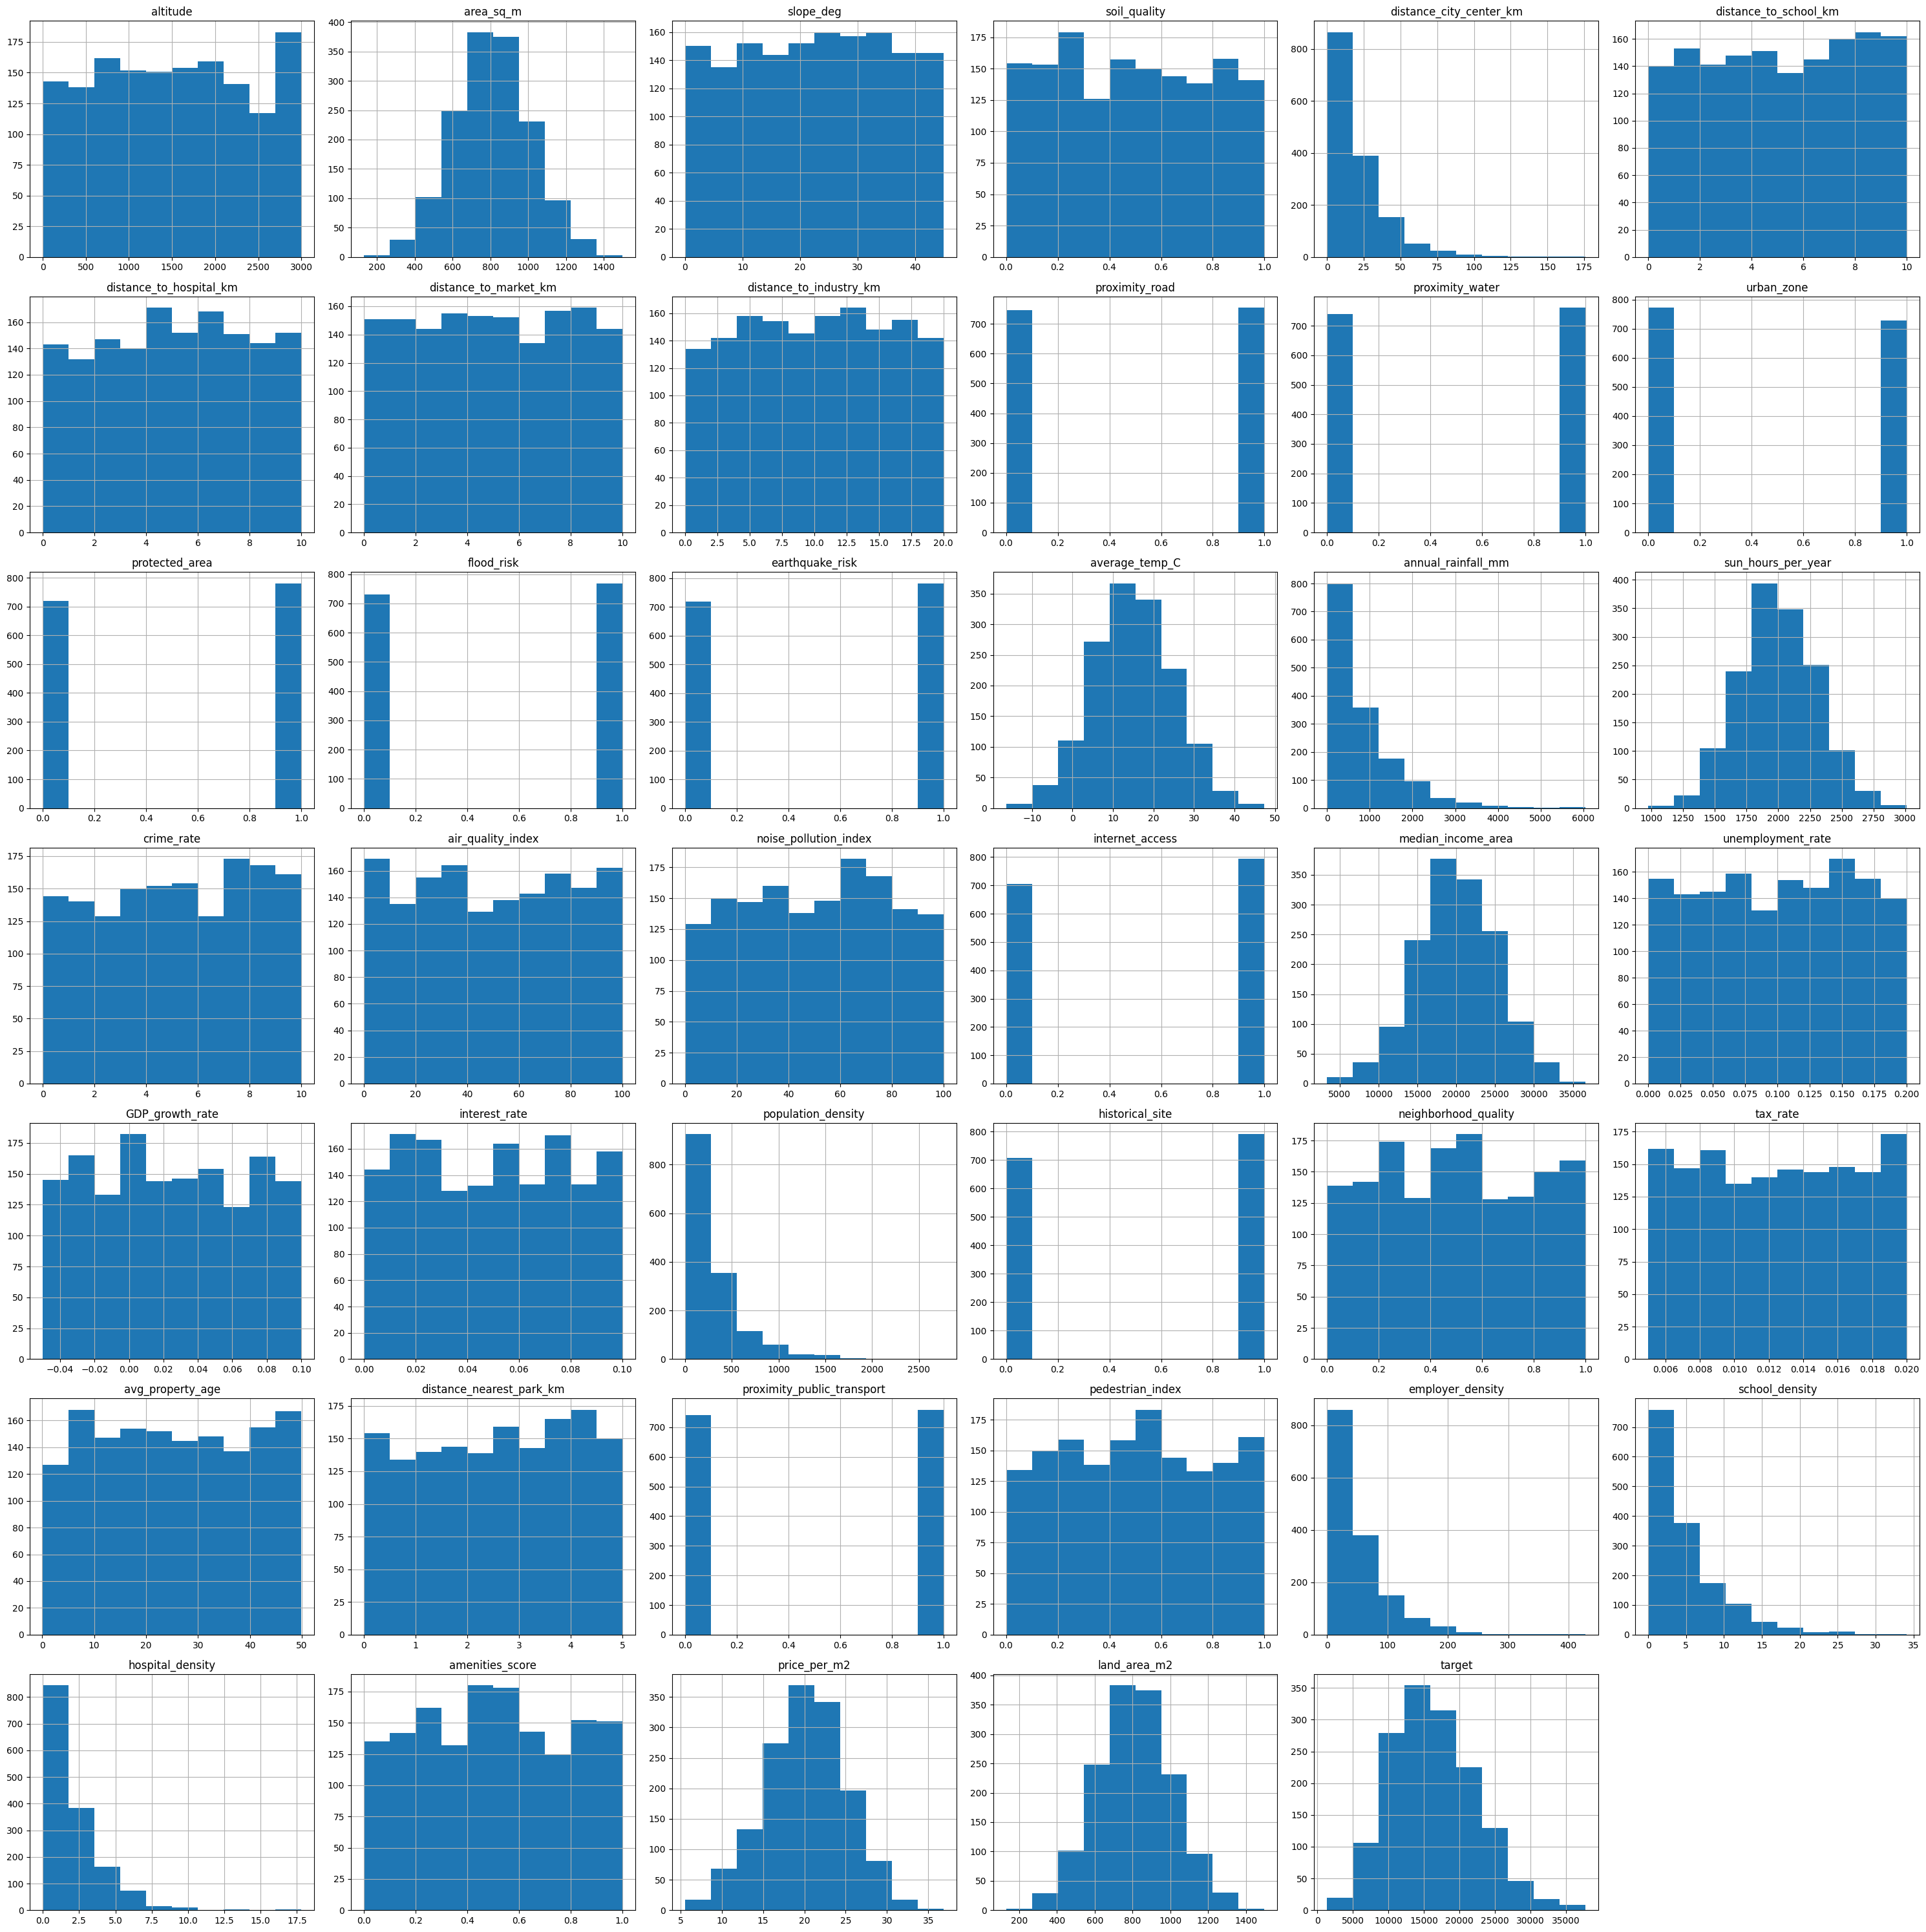

In [54]:
df[num_cols].hist(figsize=(30,30))
plt.tight_layout()
plt.show()

In [55]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
print(binary_cols)

['proximity_road', 'proximity_water', 'urban_zone', 'protected_area', 'flood_risk', 'earthquake_risk', 'internet_access', 'historical_site', 'proximity_public_transport']


In [56]:
num_cols=[i for i in num_cols if i not in binary_cols]

In [57]:
print(num_cols)

['altitude', 'area_sq_m', 'slope_deg', 'soil_quality', 'distance_city_center_km', 'distance_to_school_km', 'distance_to_hospital_km', 'distance_to_market_km', 'distance_to_industry_km', 'average_temp_C', 'annual_rainfall_mm', 'sun_hours_per_year', 'crime_rate', 'air_quality_index', 'noise_pollution_index', 'median_income_area', 'unemployment_rate', 'GDP_growth_rate', 'interest_rate', 'population_density', 'neighborhood_quality', 'tax_rate', 'avg_property_age', 'distance_nearest_park_km', 'pedestrian_index', 'employer_density', 'school_density', 'hospital_density', 'amenities_score', 'price_per_m2', 'land_area_m2', 'target']


**Correlation Analysis**

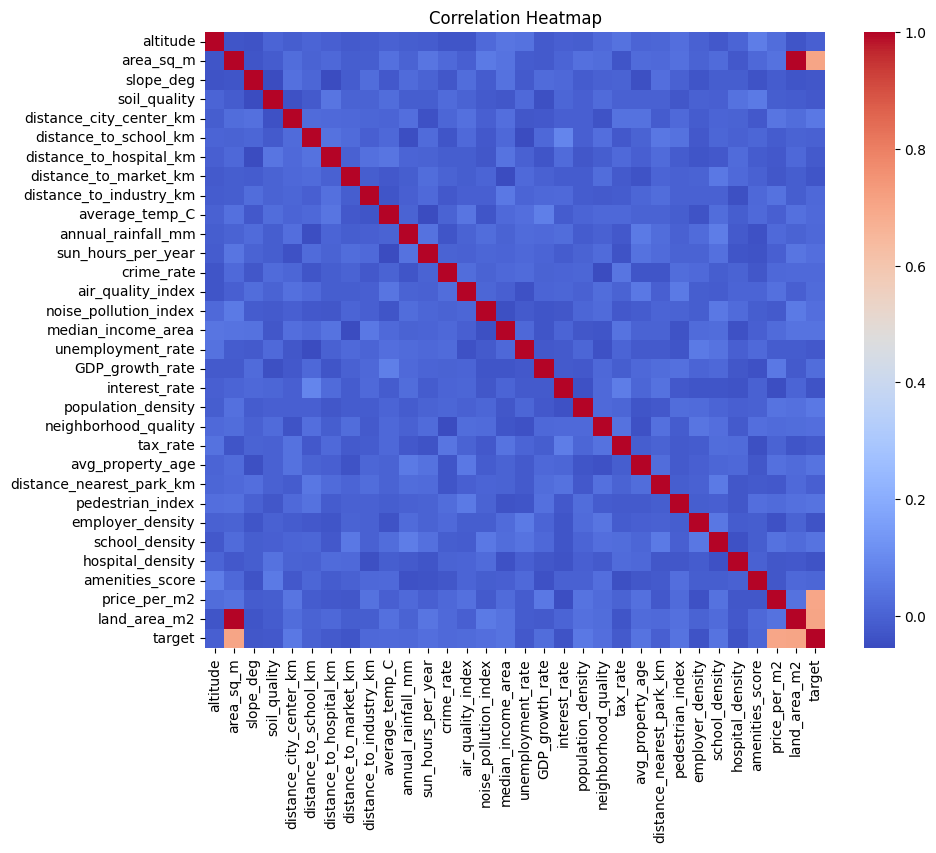

In [58]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


**Dropping Irrelevent Column**

In [59]:
df.drop('id',axis=1, inplace = True)

In [60]:
df.drop('area_sq_m',axis=1, inplace = True)

In [61]:
num_cols.remove('area_sq_m')

**Checking For Outliers**

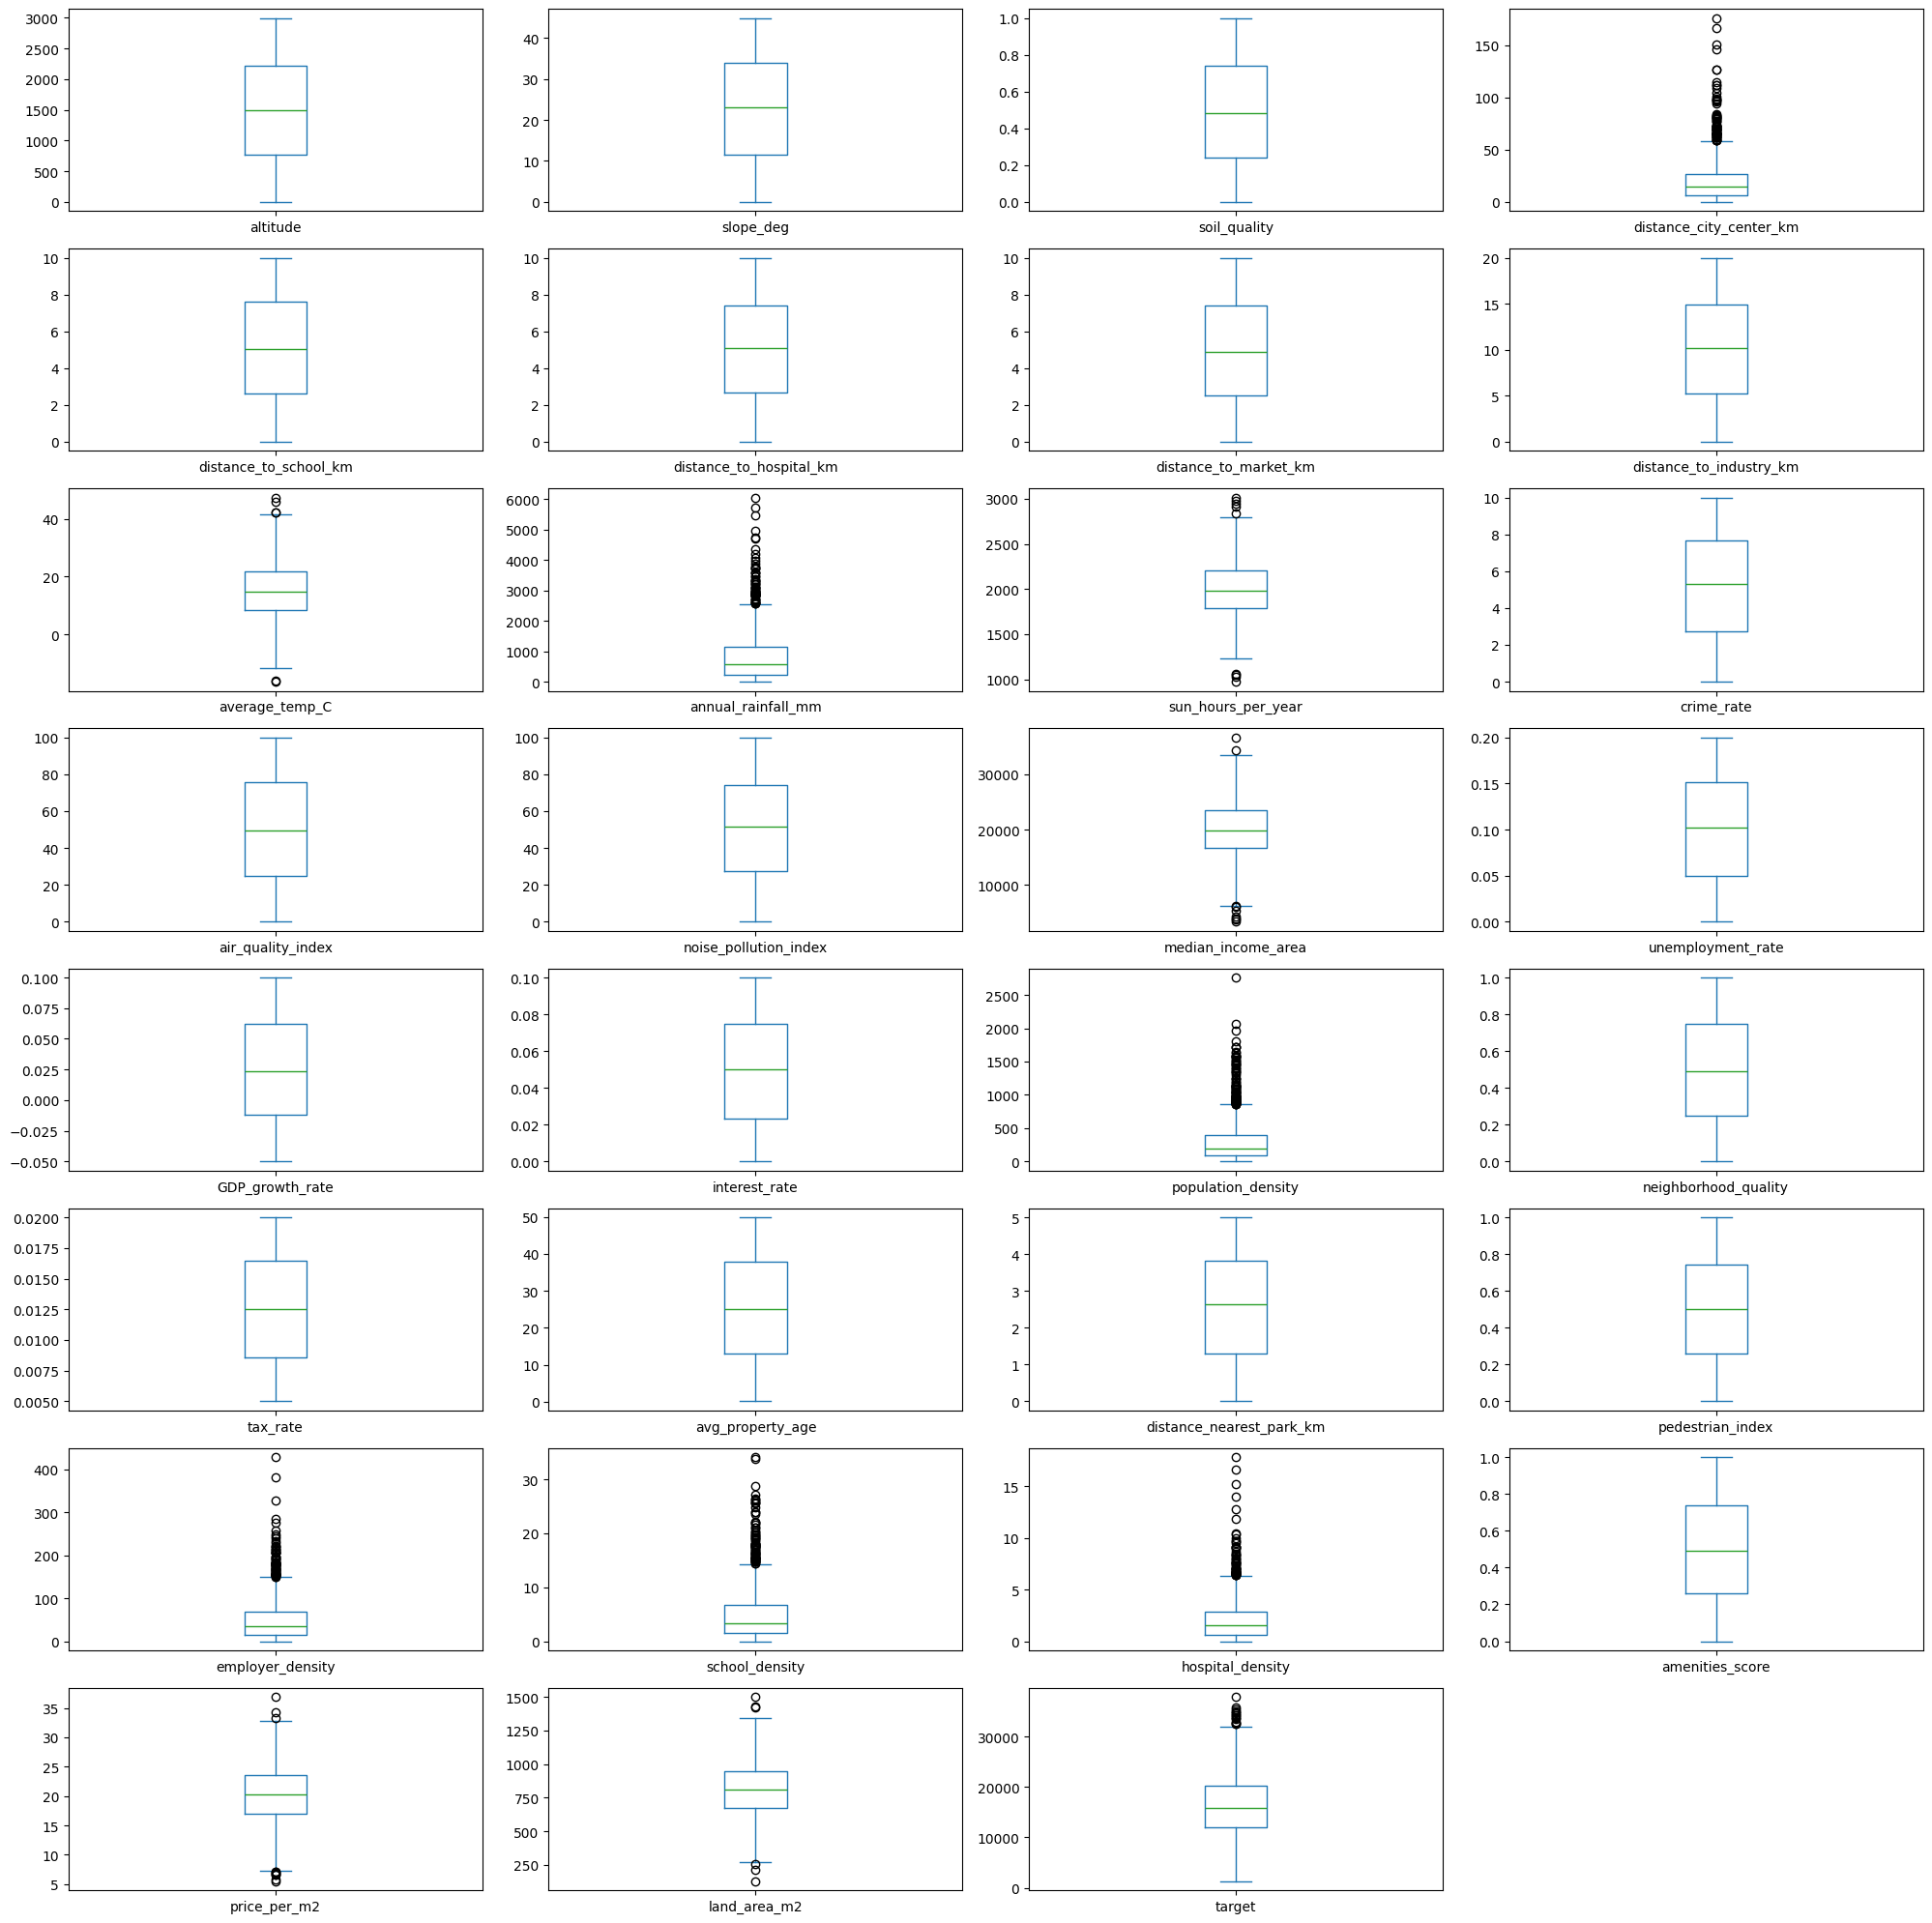

In [62]:
df[num_cols].plot(kind='box', subplots=True, layout=(8,4), figsize=(20,20))
plt.tight_layout()
plt.show()


# Feature Engineering - Data preprocessing

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [64]:
outlier_cols = ['distance_city_center_km','annual_rainfall_mm', 'population_density', 'employer_density', 'school_density', 'hospital_density','target']

In [65]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df

for col in outlier_cols:
    df = cap_outliers(df, col)

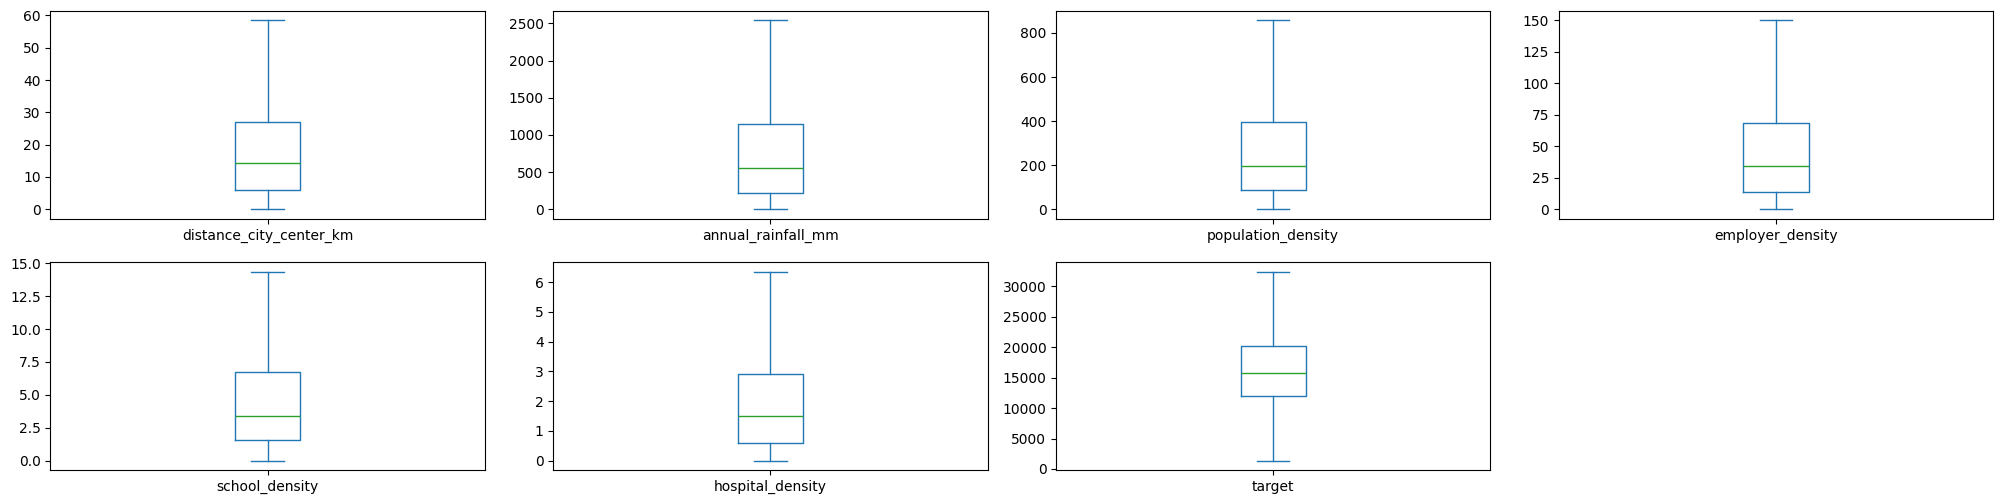

In [66]:
df[outlier_cols].plot(kind='box', subplots=True, layout=(8,4), figsize=(20,20))
plt.tight_layout()
plt.show()


In [67]:
Skewed_cols=['distance_city_center_km','annual_rainfall_mm','population_density', 'employer_density', 'school_density', 'hospital_density' ]

In [68]:
for col in Skewed_cols:
    df[col] = np.log1p(df[col])

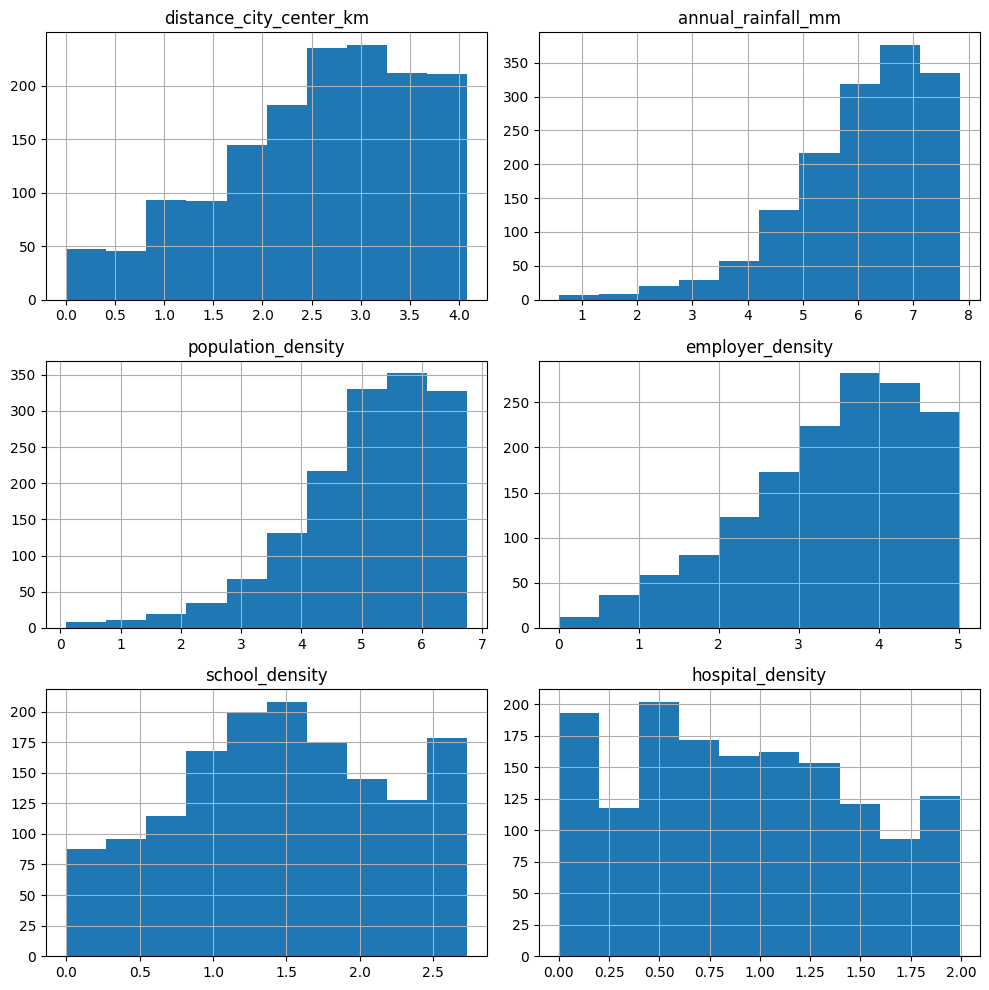

In [69]:
df[Skewed_cols].hist(figsize=(10,10))
plt.tight_layout()
plt.show()

**Encoding Categorical Variable**

In [70]:
 df = pd.get_dummies(df, columns=['location_type', 'land_use', 'zoning_code'], drop_first=True)

In [71]:
# STEP 1: Split Features and Target
X = df.drop(columns=['target'])
y = df['target']

#  STEP 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 3: Scale Numeric Features
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Results
print(f" Linear Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


 Linear Regression Performance:
R² Score: 0.9585
Mean Absolute Error (MAE): 1001.9215
Mean Squared Error (MSE): 1646180.9376
Root Mean Squared Error (RMSE): 1283.0358


In [73]:
from xgboost import XGBRegressor

# Initialize and train model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Results
print(f"\n XGBoost Performance:")
print(f"R² Score: {r2_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")



 XGBoost Performance:
R² Score: 0.9699
Mean Absolute Error (MAE): 858.7010
Mean Squared Error (MSE): 1193718.5284
Root Mean Squared Error (RMSE): 1092.5743


In [74]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize base model
xgb = XGBRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters
print(" Best Parameters Found:")
print(grid_search.best_params_)

# Best estimator
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred_best = best_model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

print("\n Tuned XGBoost Performance:")
print(f"R² Score: {r2_best:.4f}")
print(f"MAE: {mae_best:.4f}")
print(f"MSE: {mse_best:.4f}")
print(f"RMSE: {rmse_best:.4f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
 Best Parameters Found:
{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1}

 Tuned XGBoost Performance:
R² Score: 0.9702
MAE: 858.3546
MSE: 1179569.0569
RMSE: 1086.0797


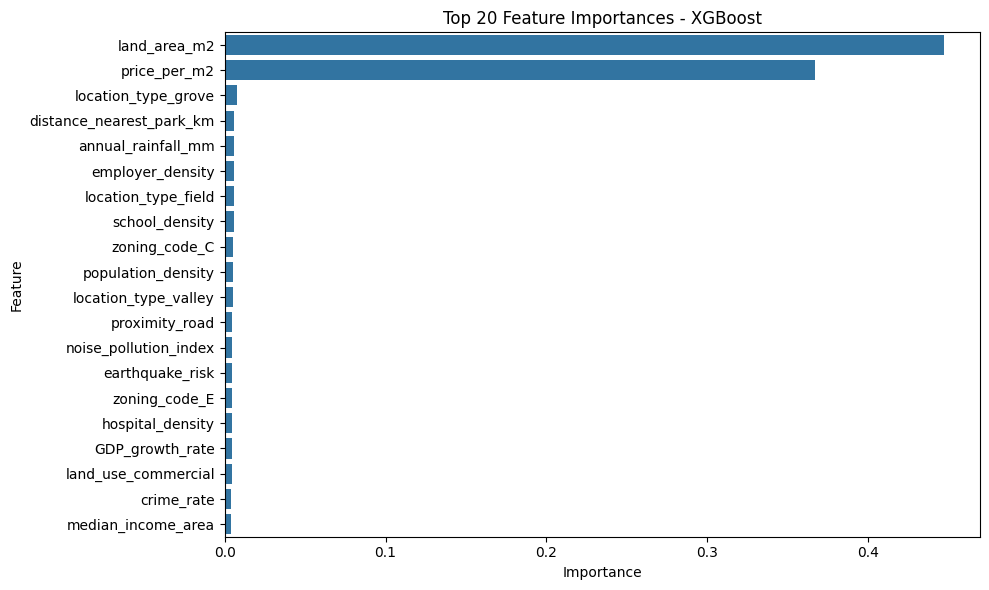

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importance = pd.Series(best_model.feature_importances_, index=X_train.columns)
top_features = importance.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 20 Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [79]:
from sklearn.linear_model import Ridge

# Initialize and train Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

# Results
print(" Ridge Regression Performance:")
print(f"R² Score: {r2_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")
print(f"MSE: {mse_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")


 Ridge Regression Performance:
R² Score: 0.9587
MAE: 999.5855
MSE: 1638627.2680
RMSE: 1280.0888


In [37]:
from sklearn.linear_model import Lasso

# Initialize and train Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predict
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

# Results
print("\n Lasso Regression Performance:")
print(f"R² Score: {r2_lasso:.4f}")
print(f"MAE: {mae_lasso:.4f}")
print(f"MSE: {mse_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.4f}")



 Lasso Regression Performance:
R² Score: 0.9586
MAE: 1000.8855
MSE: 1642956.8804
RMSE: 1281.7788


In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define a function to return evaluation metrics
def get_metrics(y_true, y_pred):
    return {
        'R2 Score': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred))
    }

# Collect metrics
results = {
    'Linear Regression': get_metrics(y_test, y_pred),
    'Ridge Regression': get_metrics(y_test, y_pred_ridge),
    'Lasso Regression': get_metrics(y_test, y_pred_lasso),
    'XGBoost (Base)': get_metrics(y_test, y_pred_xgb),
    'XGBoost (Tuned)': get_metrics(y_test, y_pred_best)
}

# Convert to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

# Display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("Model Performance Comparison:")
display(results_df)


Model Performance Comparison:


,R2 Score,MAE,MSE,RMSE
Linear Regression,0.9585,1001.9215,1.646181e+06,1283.0358
Ridge Regression,0.9587,999.5855,1.638627e+06,1280.0888
Lasso Regression,0.9586,1000.8855,1.642957e+06,1281.7788
XGBoost (Base),0.9699,858.7010,1.193719e+06,1092.5743
XGBoost (Tuned),0.9702,858.3546,1.179569e+06,1086.0797
